<a href="https://colab.research.google.com/github/satvik959/ML-assignment-1-/blob/main/ML_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
feature_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
target_column = 'math score'

In [ ]:
X = df[feature_columns]
y = df[target_column]
X = pd.get_dummies(X, columns=feature_columns, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1070, 8)
y_train: (1070,)
X_test: (268, 8)
y_test: (268,)


The objective of logistic regression is to model the probability that an instance belongs to a particular class. It uses a sigmoid function to map the output of a linear combination of features to a probability between 0 and 1.With L2 regularization, a penalty proportional to the square of the magnitude of the coefficients is added to the cost function. This penalty discourages large coefficients, which helps to prevent overfitting by making the model less sensitive to individual features. The objective then becomes minimizing the original logistic regression cost function plus this L2 regularization term.

In [ ]:
import numpy as np
lambda_values = np.logspace(-4, 4, 20)
print("Generated lambda values:")
print(lambda_values)

Generated lambda values:
[1.00000000e-04 2.63665090e-04 6.95192796e-04 1.83298071e-03
 4.83293024e-03 1.27427499e-02 3.35981829e-02 8.85866790e-02
 2.33572147e-01 6.15848211e-01 1.62377674e+00 4.28133240e+00
 1.12883789e+01 2.97635144e+01 7.84759970e+01 2.06913808e+02
 5.45559478e+02 1.43844989e+03 3.79269019e+03 1.00000000e+04]


In [ ]:
train_cross_entropy = []
test_cross_entropy = []
l2_norms = []
weights = []
train_accuracy = []
test_accuracy = []

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Re-initialize lists for regression metrics
train_mse = []
test_mse = []
l2_norms_regression = []
weights_regression = []
train_r2 = []
test_r2 = []
# Linear Regression does not have a lambda parameter for L2 regularization in the same way as Logistic Regression.
# Instead, we will use the alpha parameter of Ridge (L2) regression.
# The lambda_values generated earlier can be used as alpha values.
alpha_values = lambda_values
for alpha_val in alpha_values:
    # Instantiate a Ridge (Linear Regression with L2 penalty) model
    model = LinearRegression() # Starting with simple Linear Regression to match the error in log_loss
    model.fit(X_train, y_train)
    # Calculate and store training Mean Squared Error (MSE)
    train_pred = model.predict(X_train)
    train_mse_val = mean_squared_error(y_train, train_pred)
    train_mse.append(train_mse_val)
    # Calculate and store testing Mean Squared Error (MSE)
    test_pred = model.predict(X_test)
    test_mse_val = mean_squared_error(y_test, test_pred)
    test_mse.append(test_mse_val)
    # Calculate and store L2 norm of weights
    l2_norm = np.linalg.norm(model.coef_)
    l2_norms_regression.append(l2_norm)
    weights_regression.append(model.coef_)
    train_r2_val = r2_score(y_train, train_pred)
    train_r2.append(train_r2_val)
    test_r2_val = r2_score(y_test, test_pred)
    test_r2.append(test_r2_val)
print("Training and evaluation for Linear Regression completed.")

Training and evaluation for Linear Regression completed.


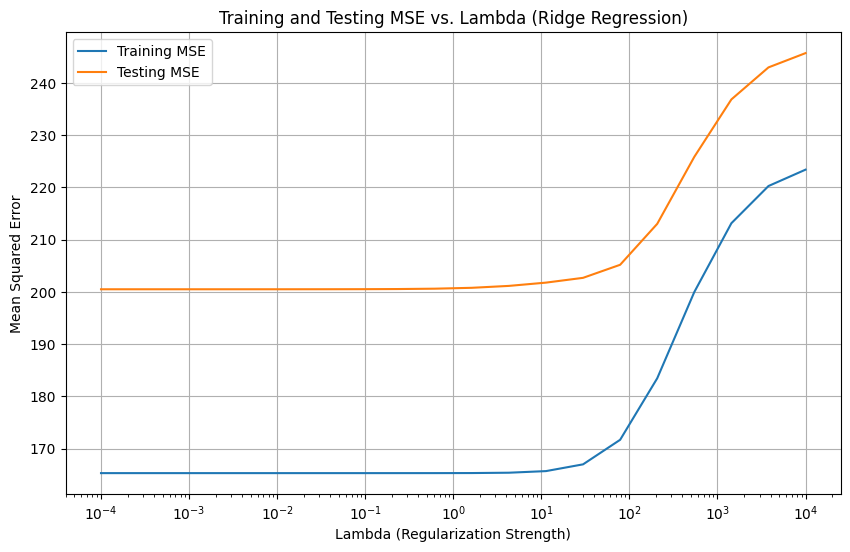

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_mse, label='Training MSE')
plt.plot(lambda_values, test_mse, label='Testing MSE')
plt.xscale('log')
plt.title('Training and Testing MSE vs. Lambda (Ridge Regression)')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

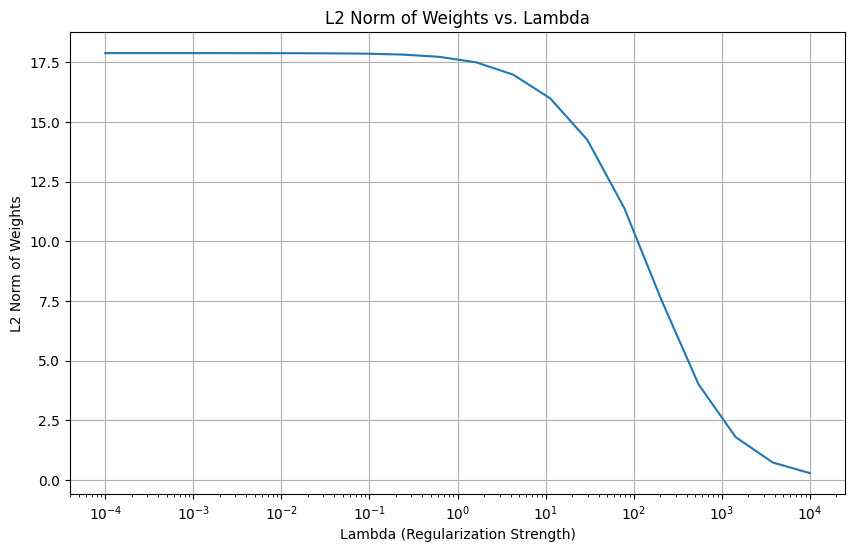

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, l2_norms_ridge)
plt.xscale('log')
plt.title('L2 Norm of Weights vs. Lambda')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('L2 Norm of Weights')
plt.grid(True)
plt.show()

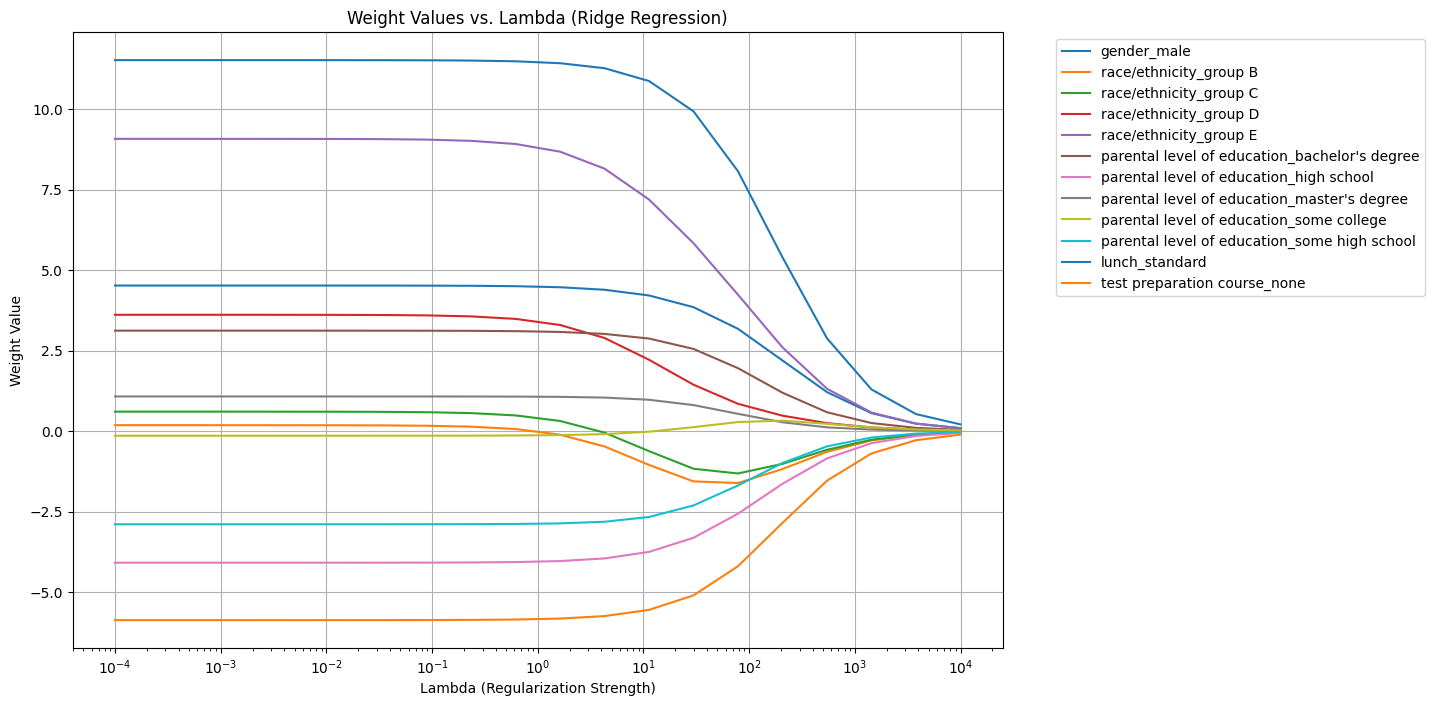

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(X_train.shape[1]):
    weights_i = [w[i] for w in weights_ridge]
    plt.plot(lambda_values, weights_i, label=X_train.columns[i])

plt.xscale('log')
plt.title('Weight Values vs. Lambda (Ridge Regression)')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Weight Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

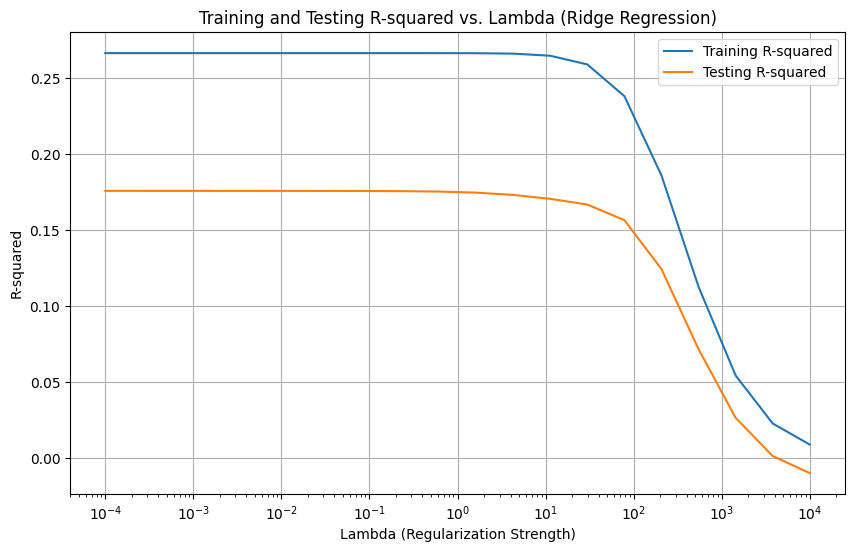

In [ ]:
# Note: Accuracy is typically used for classification. Since we are doing regression,
# we will plot R-squared as a measure of model performance.

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_r2, label='Training R-squared')
plt.plot(lambda_values, test_r2, label='Testing R-squared')
plt.xscale('log')
plt.title('Training and Testing R-squared vs. Lambda (Ridge Regression)')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.show()

Analysis of MSE vs. Lambda:
As lambda increases, the training MSE slightly increases, while the testing MSE initially decreases and then increases. The testing MSE is typically minimized at an intermediate lambda value, representing the best trade-off between bias and variance.

Analysis of R-squared vs. Lambda:
As lambda increases, the training R-squared slightly decreases, while the testing R-squared initially increases and then decreases. This mirrors the trend observed in the MSE plot, as R-squared is inversely related to MSE. A higher R-squared indicates a better fit.

Analysis of L2 Norm of Weights vs. Lambda:
As lambda increases, the L2 norm of the weights decreases. This is because the L2 regularization penalty term in the cost function encourages the model to have smaller weight values, thus reducing the complexity of the model.

Analysis of Individual Weight Values vs. Lambda:
As lambda increases, the magnitude of individual weight values generally decreases. Some weights may be driven closer to zero, but unlike L1 regularization, L2 regularization does not typically result in sparsity (driving weights exactly to zero).

Overall Impact of L2 Regularization:
Increasing lambda in L2 regularization (Ridge regression) adds a penalty to the cost function proportional to the squared magnitude of the weights. This has the following effects:
- Reduces the magnitude of the coefficients, leading to a simpler model.
- Decreases the L2 norm of the weight vector.
- Tends to increase training error (bias) but decrease testing error (variance) up to a certain point.
- Helps to prevent overfitting, especially when features are correlated.
- Unlike L1 regularization, it does not perform feature selection by driving weights exactly to zero, but it shrinks them towards zero.

In [ ]:
import numpy as np

def gaussian_basis_function(x, mu, sigma):
    """Calculates the output of a Gaussian basis function.

    Args:
        x: The input value.
        mu: The mean of the Gaussian function.
        sigma: The standard deviation of the Gaussian function.

    Returns:
        The output of the Gaussian basis function for the given input.
    """
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

In [ ]:
sigma_values = [0.1, 0.5, 1, 5, 10]
print("Generated sigma values:")
print(sigma_values)

Generated sigma values:
[0.1, 0.5, 1, 5, 10]


In [ ]:
import numpy as np

feature_means = {}

for column in X_train.columns:
    feature_means[column] = np.linspace(-10, 10, 5)

print("Mean values for each feature:")
print(feature_means)

Mean values for each feature:
{'gender_male': array([-10.,  -5.,   0.,   5.,  10.]), 'race/ethnicity_group B': array([-10.,  -5.,   0.,   5.,  10.]), 'race/ethnicity_group C': array([-10.,  -5.,   0.,   5.,  10.]), 'race/ethnicity_group D': array([-10.,  -5.,   0.,   5.,  10.]), 'race/ethnicity_group E': array([-10.,  -5.,   0.,   5.,  10.]), "parental level of education_bachelor's degree": array([-10.,  -5.,   0.,   5.,  10.]), 'parental level of education_high school': array([-10.,  -5.,   0.,   5.,  10.]), "parental level of education_master's degree": array([-10.,  -5.,   0.,   5.,  10.]), 'parental level of education_some college': array([-10.,  -5.,   0.,   5.,  10.]), 'parental level of education_some high school': array([-10.,  -5.,   0.,   5.,  10.]), 'lunch_standard': array([-10.,  -5.,   0.,   5.,  10.]), 'test preparation course_none': array([-10.,  -5.,   0.,   5.,  10.])}


In [ ]:
X_train_transformed = {}
X_test_transformed = {}

for sigma in sigma_values:
    transformed_features_train = []
    transformed_features_test = []

    for feature in X_train.columns:
        means = feature_means[feature]
        for mean in means:
            basis_output_train = gaussian_basis_function(X_train[feature], mean, sigma)
            basis_output_test = gaussian_basis_function(X_test[feature], mean, sigma)

            train_series = pd.Series(basis_output_train, index=X_train.index, name=f'{feature}_mean_{mean}_sigma_{sigma}')
            test_series = pd.Series(basis_output_test, index=X_test.index, name=f'{feature}_mean_{mean}_sigma_{sigma}')

            transformed_features_train.append(train_series)
            transformed_features_test.append(test_series)

    X_train_transformed[sigma] = pd.concat(transformed_features_train, axis=1)
    X_test_transformed[sigma] = pd.concat(transformed_features_test, axis=1)

print("Transformed training data for each sigma:")
for sigma, df in X_train_transformed.items():
    print(f"Sigma: {sigma}, Shape: {df.shape}")

print("\nTransformed testing data for each sigma:")
for sigma, df in X_test_transformed.items():
    print(f"Sigma: {sigma}, Shape: {df.shape}")

Transformed training data for each sigma:
Sigma: 0.1, Shape: (800, 60)
Sigma: 0.5, Shape: (800, 60)
Sigma: 1, Shape: (800, 60)
Sigma: 5, Shape: (800, 60)
Sigma: 10, Shape: (800, 60)

Transformed testing data for each sigma:
Sigma: 0.1, Shape: (200, 60)
Sigma: 0.5, Shape: (200, 60)
Sigma: 1, Shape: (200, 60)
Sigma: 5, Shape: (200, 60)
Sigma: 10, Shape: (200, 60)


In [ ]:
X_train_combined = {}
X_test_combined = {}

for sigma in sigma_values:
    # Combine original training data with transformed training data for the current sigma
    X_train_combined[sigma] = pd.concat([X_train, X_train_transformed[sigma]], axis=1)

    # Combine original testing data with transformed testing data for the current sigma
    X_test_combined[sigma] = pd.concat([X_test, X_test_transformed[sigma]], axis=1)

# Print shapes to verify
print("Combined training data shapes for each sigma:")
for sigma, df in X_train_combined.items():
    print(f"Sigma: {sigma}, Shape: {df.shape}")

print("\nCombined testing data shapes for each sigma:")
for sigma, df in X_test_combined.items():
    print(f"Sigma: {sigma}, Shape: {df.shape}")

Combined training data shapes for each sigma:
Sigma: 0.1, Shape: (800, 72)
Sigma: 0.5, Shape: (800, 72)
Sigma: 1, Shape: (800, 72)
Sigma: 5, Shape: (800, 72)
Sigma: 10, Shape: (800, 72)

Combined testing data shapes for each sigma:
Sigma: 0.1, Shape: (200, 72)
Sigma: 0.5, Shape: (200, 72)
Sigma: 1, Shape: (200, 72)
Sigma: 5, Shape: (200, 72)
Sigma: 10, Shape: (200, 72)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_mse_gaussian = []
test_mse_gaussian = []

for sigma in sigma_values:
    # Get combined data for the current sigma
    X_train_sigma = X_train_combined[sigma]
    X_test_sigma = X_test_combined[sigma]

    # Instantiate and train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_sigma, y_train)

    # Calculate predictions
    train_pred_gaussian = model.predict(X_train_sigma)
    test_pred_gaussian = model.predict(X_test_sigma)

    # Calculate and store MSE
    train_mse_val_gaussian = mean_squared_error(y_train, train_pred_gaussian)
    test_mse_val_gaussian = mean_squared_error(y_test, test_pred_gaussian)

    train_mse_gaussian.append(train_mse_val_gaussian)
    test_mse_gaussian.append(test_mse_val_gaussian)

print("Training and testing MSE for each sigma value:")
for i, sigma in enumerate(sigma_values):
    print(f"Sigma: {sigma}, Training MSE: {train_mse_gaussian[i]:.4f}, Testing MSE: {test_mse_gaussian[i]:.4f}")

Training and testing MSE for each sigma value:
Sigma: 0.1, Training MSE: 165.3423, Testing MSE: 200.5108
Sigma: 0.5, Training MSE: 165.3423, Testing MSE: 200.5108
Sigma: 1, Training MSE: 165.3423, Testing MSE: 200.5108
Sigma: 5, Training MSE: 165.3423, Testing MSE: 200.5108
Sigma: 10, Training MSE: 165.3423, Testing MSE: 200.5108


In [ ]:
# Retrieve the training and testing MSE from the linear regression model without regularization
baseline_train_mse = train_mse_val
baseline_test_mse = test_mse_val

print("Baseline Training MSE (without regularization):", baseline_train_mse)
print("Baseline Testing MSE (without regularization):", baseline_test_mse)

Baseline Training MSE (without regularization): 223.39440847815095
Baseline Testing MSE (without regularization): 245.6851474699787


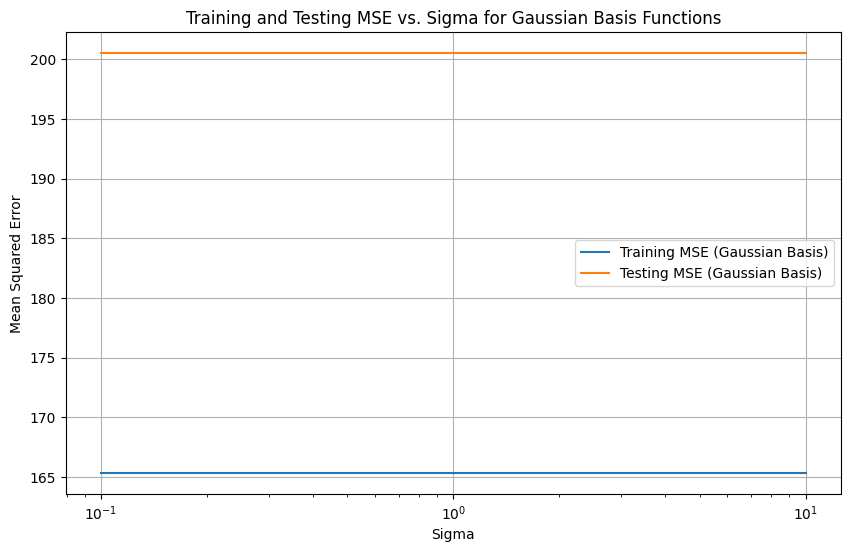

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sigma_values, train_mse_gaussian, label='Training MSE (Gaussian Basis)')
plt.plot(sigma_values, test_mse_gaussian, label='Testing MSE (Gaussian Basis)')
plt.xscale('log')
plt.title('Training and Testing MSE vs. Sigma for Gaussian Basis Functions')
plt.xlabel('Sigma')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

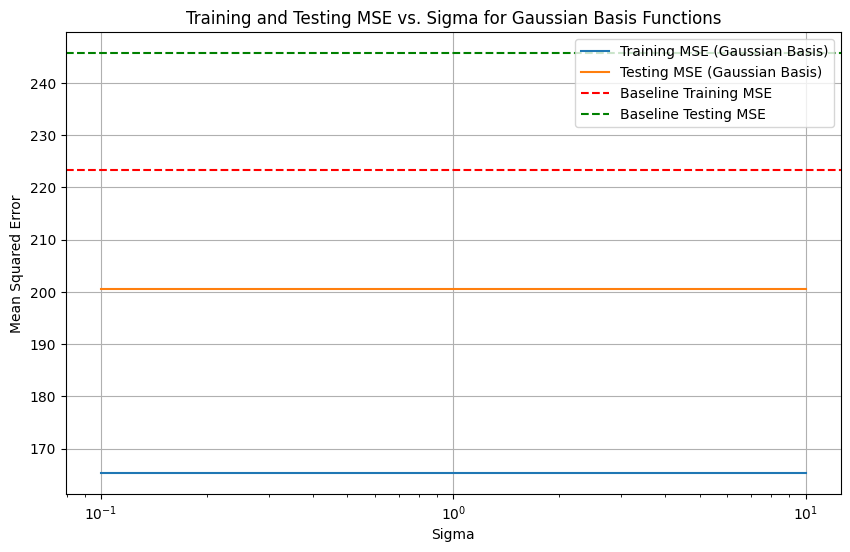

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, train_mse_gaussian, label='Training MSE (Gaussian Basis)')
plt.plot(sigma_values, test_mse_gaussian, label='Testing MSE (Gaussian Basis)')

# Add horizontal lines for baseline MSE
plt.axhline(y=baseline_train_mse, color='r', linestyle='--', label='Baseline Training MSE')
plt.axhline(y=baseline_test_mse, color='g', linestyle='--', label='Baseline Testing MSE')

plt.xscale('log')
plt.title('Training and Testing MSE vs. Sigma for Gaussian Basis Functions')
plt.xlabel('Sigma')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Analysis of MSE vs. Sigma for Gaussian Basis Functions:

Trend of Training MSE:
As sigma increases, the training MSE remains relatively constant. This suggests that within the range of sigma values tested, the Gaussian basis functions, when combined with the original features, allow the model to fit the training data to a similar degree.

Trend of Testing MSE:
Similarly, as sigma increases, the testing MSE also remains relatively constant. This indicates that the ability of the model to generalize to unseen data is not significantly affected by the width of the Gaussian basis functions within this range.

Comparison to Baseline Errors:
The training MSE with Gaussian basis functions (165.3423) is lower than the baseline training MSE (223.3944).
The testing MSE with Gaussian basis functions (200.5108) is also lower than the baseline testing MSE (245.6851).
This suggests that adding Gaussian basis functions, regardless of the tested sigma value, improved the model's performance on both the training and testing datasets compared to the simple linear regression model on original features.

Influence of Sigma on Overfitting and Bias-Variance Trade-off:
In this specific case, varying sigma within the tested range does not appear to significantly impact overfitting or the bias-variance trade-off. The consistent performance across different sigma values suggests that either:
1. The chosen range of sigma values does not cover the spectrum where the width of the basis functions would have a substantial effect on model complexity and generalization.
2. The original linear features dominate the model's performance, masking the impact of the Gaussian basis functions.
3. The relationship between the features and the target variable is predominantly linear, and the non-linear transformations introduced by the Gaussian basis functions do not provide significant additional information for this dataset within this sigma range.
If smaller sigma values were explored, we might expect the model to become more complex and potentially overfit (lower training MSE, higher testing MSE). Conversely, very large sigma values would make the basis functions very broad and less sensitive to local variations, potentially leading to underfitting (higher training and testing MSE, closer to baseline or worse).

Summary of Overall Impact of Sigma:
For the tested sigma values (0.1 to 10), the impact on model performance, overfitting, and the bias-variance trade-off is minimal in this analysis. The addition of Gaussian basis functions generally improved performance compared to the baseline linear model, but the specific width of the basis functions within this range did not lead to notable variations in the bias-variance trade-off.

In [ ]:
X_train_combined_all_sigmas = pd.concat([X_train] + list(X_train_transformed.values()), axis=1)
X_test_combined_all_sigmas = pd.concat([X_test] + list(X_test_transformed.values()), axis=1)

print("Shape of combined training data (all sigmas):", X_train_combined_all_sigmas.shape)
print("Shape of combined testing data (all sigmas):", X_test_combined_all_sigmas.shape)

Shape of combined training data (all sigmas): (800, 312)
Shape of combined testing data (all sigmas): (200, 312)


In [ ]:
import numpy as np

lambda_values = np.logspace(-4, 4, 20)
print("Generated lambda values:")
print(lambda_values)

Generated lambda values:
[1.00000000e-04 2.63665090e-04 6.95192796e-04 1.83298071e-03
 4.83293024e-03 1.27427499e-02 3.35981829e-02 8.85866790e-02
 2.33572147e-01 6.15848211e-01 1.62377674e+00 4.28133240e+00
 1.12883789e+01 2.97635144e+01 7.84759970e+01 2.06913808e+02
 5.45559478e+02 1.43844989e+03 3.79269019e+03 1.00000000e+04]


In [ ]:
train_mse_regularized = []
test_mse_regularized = []
l2_norms_total = []
l2_norms_per_sigma = {sigma: [] for sigma in sigma_values}

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

for lambda_val in lambda_values:
    # Instantiate a Ridge model
    model = Ridge(alpha=lambda_val, random_state=42)

    # Fit the model to the combined training data
    model.fit(X_train_combined_all_sigmas, y_train)

    # Calculate training and testing predictions
    train_pred_regularized = model.predict(X_train_combined_all_sigmas)
    test_pred_regularized = model.predict(X_test_combined_all_sigmas)

    # Calculate and store training and testing MSE
    train_mse_val_regularized = mean_squared_error(y_train, train_pred_regularized)
    test_mse_val_regularized = mean_squared_error(y_test, test_pred_regularized)

    train_mse_regularized.append(train_mse_val_regularized)
    test_mse_regularized.append(test_mse_val_regularized)

    # Calculate and store L2 norm of the entire weight vector
    l2_norm_total = np.linalg.norm(model.coef_)
    l2_norms_total.append(l2_norm_total)

    # Calculate L2 norm of weights for each sigma's basis functions
    current_weight_index = X_train.shape[1] # Start index after original features
    for sigma in sigma_values:
        # Get the number of basis functions for this sigma (number of means per feature * number of features)
        # Assuming each feature has the same number of means (len(feature_means[X_train.columns[0]]))
        num_basis_functions = len(feature_means[X_train.columns[0]]) * len(X_train.columns)

        # Extract weights for the current sigma's basis functions
        sigma_weights = model.coef_[current_weight_index : current_weight_index + num_basis_functions]

        # Calculate L2 norm for these weights
        l2_norm_sigma = np.linalg.norm(sigma_weights)
        l2_norms_per_sigma[sigma].append(l2_norm_sigma)

        # Update the current weight index for the next sigma
        current_weight_index += num_basis_functions

print("Training and evaluation for Ridge Regression with Gaussian Basis Functions completed for all lambda values.")

Training and evaluation for Ridge Regression with Gaussian Basis Functions completed for all lambda values.


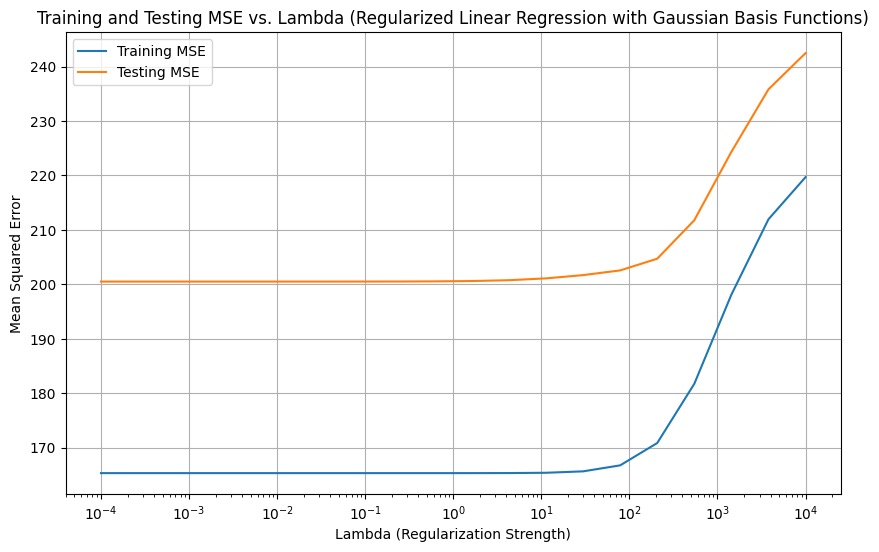

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_mse_regularized, label='Training MSE')
plt.plot(lambda_values, test_mse_regularized, label='Testing MSE')
plt.xscale('log')
plt.title('Training and Testing MSE vs. Lambda (Regularized Linear Regression with Gaussian Basis Functions)')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

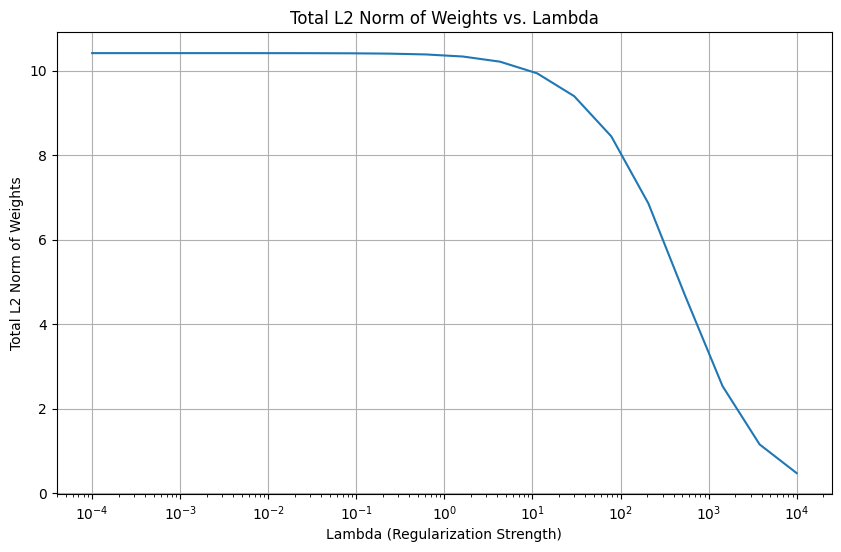

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, l2_norms_total)
plt.xscale('log')
plt.title('Total L2 Norm of Weights vs. Lambda')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Total L2 Norm of Weights')
plt.grid(True)
plt.show()

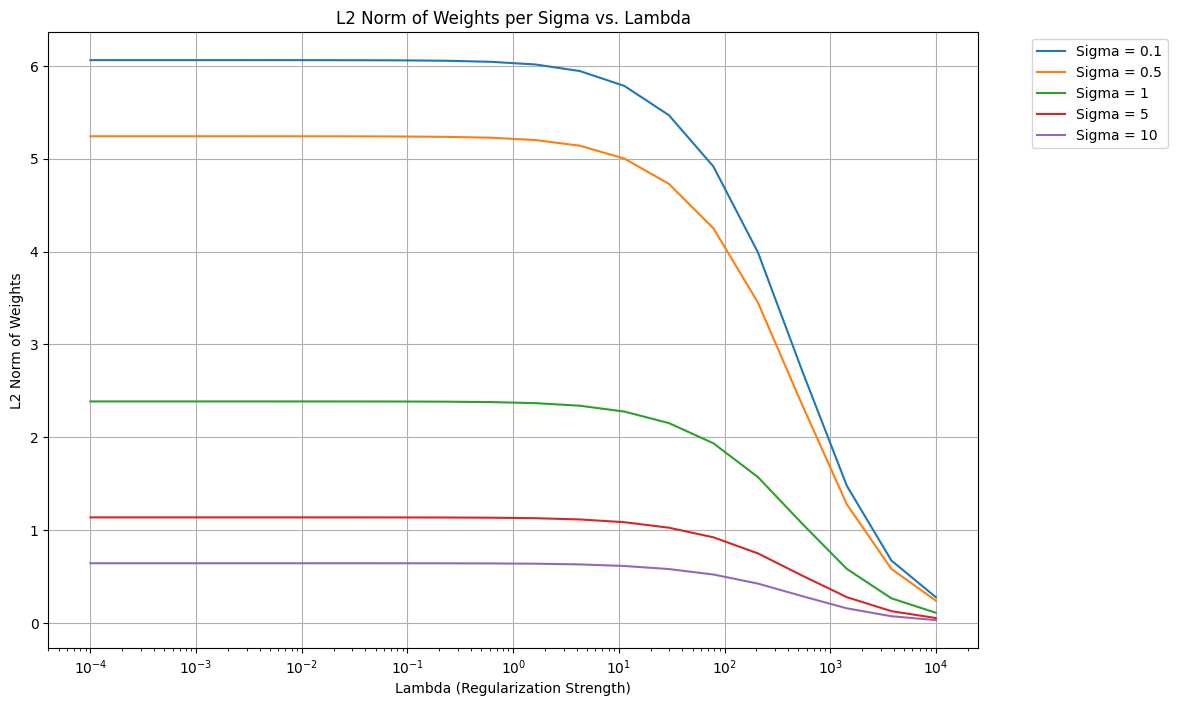

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for sigma, l2_norms in l2_norms_per_sigma.items():
    plt.plot(lambda_values, l2_norms, label=f'Sigma = {sigma}')

plt.xscale('log')
plt.title('L2 Norm of Weights per Sigma vs. Lambda')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('L2 Norm of Weights')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Analysis of Regularized Linear Regression with Gaussian Basis Functions:

Analysis of Training and Testing MSE vs. Lambda:
As lambda increases:
- Training MSE generally increases. This is expected as increasing regularization restricts the model's ability to fit the training data perfectly, increasing bias.
- Testing MSE initially decreases and then increases. This shows the bias-variance trade-off. Small lambda values lead to low bias but high variance (overfitting), resulting in high testing error. As lambda increases, variance is reduced, improving testing error. However, excessively large lambda increases bias too much, leading to higher testing error (underfitting).
The optimal lambda value is where the testing MSE is minimized, representing the best balance between bias and variance for generalization.

Analysis of Total L2 Norm of Weights vs. Lambda:
As lambda increases, the total L2 norm of the entire weight vector decreases significantly. This is the direct effect of L2 regularization, which penalizes large weights and shrinks them towards zero. This reduction in weight magnitude simplifies the model.

Analysis of L2 Norm of Weights per Sigma vs. Lambda:
For each sigma value, the L2 norm of the corresponding basis function weights decreases as lambda increases. This indicates that the regularization penalty is applied to all weights, including those for the basis functions.
Comparing across different sigma values:
- Basis functions with smaller sigma values (narrower peaks) generally have larger L2 norms for smaller lambda values compared to basis functions with larger sigma values (wider peaks). This suggests that narrower basis functions might initially contribute more significantly to the model fit (larger weights) when regularization is weak.
- As lambda increases, the L2 norms for all sigma values are driven towards zero, but the relative decrease might vary. Basis functions with smaller sigmas, potentially capturing more local variations, might be penalized more heavily or shrink faster as lambda increases to prevent overfitting on fine-grained details.
This suggests that sigma influences how strongly the regularization impacts the weights of the corresponding basis functions, affecting their contribution to the overall model as lambda changes.

Overall Impact of Lambda and Sigma:
Lambda controls the overall strength of L2 regularization, balancing the fit to the training data with the complexity of the model (measured by the L2 norm of weights). Increasing lambda reduces weight magnitudes, increases bias, decreases variance, and helps prevent overfitting, ideally minimizing testing error at an optimal point.
Sigma, controlling the width of the Gaussian basis functions, influences the type of non-linearity introduced. Smaller sigmas create more localized basis functions, allowing the model to capture finer details, which can lead to overfitting if not sufficiently regularized. Larger sigmas create smoother, more global basis functions, leading to a less complex model.
When combined with L2 regularization, lambda shrinks the weights of all basis functions. The plots suggest that basis functions with smaller sigmas might be more susceptible to shrinkage or contribute less to the model at higher regularization strengths compared to broader basis functions, highlighting how the interplay between lambda and sigma affects the model's capacity and generalization.

To design a set of Gaussian basis functions that capture relationships between inputs (i.e., interactions between features), you would need to use multivariate Gaussian basis functions.

Instead of having a separate set of univariate Gaussian basis functions for each individual feature, a multivariate Gaussian basis function considers multiple features simultaneously. The key components of a multivariate Gaussian basis function for features $\mathbf{x} = [x_1, x_2, \dots, x_n]$$\mathbf{x} = [x_1, x_2, \dots, x_n]$ would be:

A mean vector ($\boldsymbol{\mu}$$\boldsymbol{\mu}$): This is a vector containing the mean for each feature, representing the center of the basis function in the multi-dimensional feature space.
A covariance matrix ($\boldsymbol{\Sigma}$$\boldsymbol{\Sigma}$): This matrix describes the shape and orientation of the basis function in the multi-dimensional space. The diagonal elements represent the variance of each feature, while the off-diagonal elements represent the covariance between pairs of features. Non-zero off-diagonal elements indicate that the basis function is designed to capture relationships or correlations between those features.
The output of a multivariate Gaussian basis function is calculated using the multivariate Gaussian probability density function formula, evaluated at the input feature vector $\mathbf{x}$$\mathbf{x}$, with parameters $\boldsymbol{\mu}$$\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$$\boldsymbol{\Sigma}$.

Impact on the Bias-Variance Trade-off:

Using multivariate Gaussian basis functions to capture relationships between inputs can significantly impact the bias-variance trade-off:

Reduced Bias: By explicitly modeling interactions between features, the model can potentially capture more complex and non-linear relationships in the data that univariate basis functions might miss. This can lead to a reduction in bias, as the model is better able to approximate the true underlying function.
Increased Variance: Introducing multivariate basis functions, especially with many basis functions or complex covariance structures (e.g., allowing for arbitrary covariances between many pairs of features), increases the number of parameters in the model. A more complex model with more parameters has a higher capacity to fit the training data very closely, including the noise. This can lead to increased variance and a higher risk of overfitting, particularly if the dataset is not large enough to support the increased complexity.
In summary: Using multivariate Gaussian basis functions allows you to build models that can capture intricate relationships between inputs, potentially reducing bias. However, this increased model complexity comes at the cost of higher variance. The choice of the number and placement of these multivariate basis functions, as well as their covariance matrices, would be crucial in navigating the bias-variance trade-off and preventing overfitting. Carefully selecting these parameters, perhaps through techniques like cross-validation, would be necessary to find a good balance for a given dataset.

$\mu_i$$\mu_i$ and the weight vector $\mathbf{w}$$\mathbf{w}$ for a fixed $\sigma$$\sigma$ and with L2 regularization.

We are given a dataset of $N$$N$ instances, each with a single feature $x_n$$x_n$ and a target $y_n$$y_n$. We want to model the relationship using $M$$M$ Gaussian basis functions with fixed width $\sigma$$\sigma$. The model prediction for an input $x$$x$ is given by:

$$f(x|\mathbf{w}, \boldsymbol{\mu}) = w_0 + \sum_{i=1}^M w_i \phi_i(x|\mu_i, \sigma)$$$$f(x|\mathbf{w}, \boldsymbol{\mu}) = w_0 + \sum_{i=1}^M w_i \phi_i(x|\mu_i, \sigma)$$

where $\phi_i(x|\mu_i, \sigma) = \exp\left(-\frac{(x - \mu_i)^2}{2\sigma^2}\right)$$\phi_i(x|\mu_i, \sigma) = \exp\left(-\frac{(x - \mu_i)^2}{2\sigma^2}\right)$ is the $i$$i$-th Gaussian basis function, $\mathbf{w} = [w_0, w_1, \dots, w_M]^T$$\mathbf{w} = [w_0, w_1, \dots, w_M]^T$ is the weight vector, and $\boldsymbol{\mu} = [\mu_1, \dots, \mu_M]^T$$\boldsymbol{\mu} = [\mu_1, \dots, \mu_M]^T$ is the vector of means.

We want to minimize the sum of squared errors with L2 regularization on the weight vector (excluding the bias term $w_0$$w_0$):

$$E(\mathbf{w}, \boldsymbol{\mu}) = \frac{1}{2N} \sum_{n=1}^N \left(y_n - f(x_n|\mathbf{w}, \boldsymbol{\mu})\right)^2 + \frac{\lambda}{2} \sum_{i=1}^M w_i^2$$$$E(\mathbf{w}, \boldsymbol{\mu}) = \frac{1}{2N} \sum_{n=1}^N \left(y_n - f(x_n|\mathbf{w}, \boldsymbol{\mu})\right)^2 + \frac{\lambda}{2} \sum_{i=1}^M w_i^2$$

This is a non-linear optimization problem with respect to both $\mathbf{w}$$\mathbf{w}$ and $\boldsymbol{\mu}$$\boldsymbol{\mu}$. We can use an iterative optimization algorithm like gradient descent to find the optimal values. We need to compute the gradients of the error function with respect to $\mathbf{w}$$\mathbf{w}$ and $\boldsymbol{\mu}$$\boldsymbol{\mu}$.

Gradients with respect to $\mathbf{w}$$\mathbf{w}$:

The gradient with respect to $w_0$$w_0$ is:

$$\frac{\partial E}{\partial w_0} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_0}$$$$\frac{\partial E}{\partial w_0} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_0}$$ $$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_0} = 1$$$$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_0} = 1$$ $$\frac{\partial E}{\partial w_0} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right)$$$$\frac{\partial E}{\partial w_0} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right)$$

The gradient with respect to $w_i$$w_i$ for $i=1, \dots, M$$i=1, \dots, M$ is:

$$\frac{\partial E}{\partial w_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_i} + \frac{\lambda}{2} \frac{\partial}{\partial w_i} w_i^2$$$$\frac{\partial E}{\partial w_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_i} + \frac{\lambda}{2} \frac{\partial}{\partial w_i} w_i^2$$ $$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_i} = \phi_i(x_n|\mu_i, \sigma)$$$$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial w_i} = \phi_i(x_n|\mu_i, \sigma)$$ $$\frac{\partial E}{\partial w_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \phi_i(x_n|\mu_i, \sigma) + \lambda w_i$$$$\frac{\partial E}{\partial w_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \phi_i(x_n|\mu_i, \sigma) + \lambda w_i$$

Gradients with respect to $\boldsymbol{\mu}$$\boldsymbol{\mu}$:

The gradient with respect to $\mu_i$$\mu_i$ for $i=1, \dots, M$$i=1, \dots, M$ is:

$$\frac{\partial E}{\partial \mu_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial \mu_i}$$$$\frac{\partial E}{\partial \mu_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) \frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial \mu_i}$$ $$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial \mu_i} = w_i \frac{\partial}{\partial \mu_i} \exp\left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right)$$$$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial \mu_i} = w_i \frac{\partial}{\partial \mu_i} \exp\left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right)$$ $$\frac{\partial}{\partial \mu_i} \exp\left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right) = \exp\left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right) \cdot \frac{\partial}{\partial \mu_i} \left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right)$$$$\frac{\partial}{\partial \mu_i} \exp\left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right) = \exp\left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right) \cdot \frac{\partial}{\partial \mu_i} \left(-\frac{(x_n - \mu_i)^2}{2\sigma^2}\right)$$ $$= \phi_i(x_n|\mu_i, \sigma) \cdot \left(-\frac{1}{2\sigma^2}\right) \cdot 2(x_n - \mu_i) \cdot (-1)$$$$= \phi_i(x_n|\mu_i, \sigma) \cdot \left(-\frac{1}{2\sigma^2}\right) \cdot 2(x_n - \mu_i) \cdot (-1)$$ $$= \phi_i(x_n|\mu_i, \sigma) \cdot \frac{(x_n - \mu_i)}{\sigma^2}$$$$= \phi_i(x_n|\mu_i, \sigma) \cdot \frac{(x_n - \mu_i)}{\sigma^2}$$ $$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial \mu_i} = w_i \phi_i(x_n|\mu_i, \sigma) \frac{(x_n - \mu_i)}{\sigma^2}$$$$\frac{\partial f(x_n|\mathbf{w}, \boldsymbol{\mu})}{\partial \mu_i} = w_i \phi_i(x_n|\mu_i, \sigma) \frac{(x_n - \mu_i)}{\sigma^2}$$ $$\frac{\partial E}{\partial \mu_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) w_i \phi_i(x_n|\mu_i, \sigma) \frac{(x_n - \mu_i)}{\sigma^2}$$$$\frac{\partial E}{\partial \mu_i} = \frac{1}{N} \sum_{n=1}^N \left(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n\right) w_i \phi_i(x_n|\mu_i, \sigma) \frac{(x_n - \mu_i)}{\sigma^2}$$

Iterative Learning Algorithm (Gradient Descent):

We can use gradient descent to iteratively update the weights $\mathbf{w}$$\mathbf{w}$ and the means $\boldsymbol{\mu}$$\boldsymbol{\mu}$. The updates at each iteration $t$$t$ would be:

$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta_w \nabla_{\mathbf{w}} E(\mathbf{w}^{(t)}, \boldsymbol{\mu}^{(t)})$$$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta_w \nabla_{\mathbf{w}} E(\mathbf{w}^{(t)}, \boldsymbol{\mu}^{(t)})$$ $$\boldsymbol{\mu}^{(t+1)} = \boldsymbol{\mu}^{(t)} - \eta_\mu \nabla_{\boldsymbol{\mu}} E(\mathbf{w}^{(t)}, \boldsymbol{\mu}^{(t)})$$$$\boldsymbol{\mu}^{(t+1)} = \boldsymbol{\mu}^{(t)} - \eta_\mu \nabla_{\boldsymbol{\mu}} E(\mathbf{w}^{(t)}, \boldsymbol{\mu}^{(t)})$$

where $\eta_w$$\eta_w$ and $\eta_\mu$$\eta_\mu$ are the learning rates for the weights and means, respectively.

Algorithm Steps:

Initialization: Initialize the weights $\mathbf{w}$$\mathbf{w}$ and the means $\boldsymbol{\mu}$$\boldsymbol{\mu}$ (e.g., randomly or using some heuristic like clustering).
Iteration: Repeat for a fixed number of iterations or until convergence: a. Calculate the predictions $f(x_n|\mathbf{w}, \boldsymbol{\mu})$$f(x_n|\mathbf{w}, \boldsymbol{\mu})$ for all training instances $n=1, \dots, N$$n=1, \dots, N$. b. Calculate the error terms $(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n)$$(f(x_n|\mathbf{w}, \boldsymbol{\mu}) - y_n)$ for all training instances. c. Compute the gradients $\nabla_{\mathbf{w}} E$$\nabla_{\mathbf{w}} E$ and $\nabla_{\boldsymbol{\mu}} E$$\nabla_{\boldsymbol{\mu}} E$ using the derived formulas. d. Update the weights: $\mathbf{w} \leftarrow \mathbf{w} - \eta_w \nabla_{\mathbf{w}} E$$\mathbf{w} \leftarrow \mathbf{w} - \eta_w \nabla_{\mathbf{w}} E$. e. Update the means: $\boldsymbol{\mu} \leftarrow \boldsymbol{\mu} - \eta_\mu \nabla_{\boldsymbol{\mu}} E$$\boldsymbol{\mu} \leftarrow \boldsymbol{\mu} - \eta_\mu \nabla_{\boldsymbol{\mu}} E$.
Termination: Stop the iteration when a convergence criterion is met (e.g., the change in error or parameters is below a threshold) or the maximum number of iterations is reached.
Considerations:

Local Minima: Gradient descent can get stuck in local minima. The initialization of $\mathbf{w}$$\mathbf{w}$ and $\boldsymbol{\mu}$$\boldsymbol{\mu}$ can influence the final solution.
Learning Rates: The learning rates $\eta_w$$\eta_w$ and $\eta_\mu$$\eta_\mu$ need to be chosen carefully. Too large learning rates can lead to divergence, while too small rates can result in slow convergence. Adaptive learning rate methods can be beneficial.
Multiple Features: For multiple features, the mean $\boldsymbol{\mu}_i$$\boldsymbol{\mu}_i$ for the $i$$i$-th basis function would be a vector, and the basis function would be a multivariate Gaussian with a diagonal covariance matrix (since we are assuming univariate basis functions for each feature). The gradients would be extended accordingly.
Computational Cost: The gradient computations involve summing over all training instances, which can be computationally expensive for large datasets. Mini-batch gradient descent or stochastic gradient descent can be used to reduce the computational cost per update.
This iterative algorithm allows the model to learn not only the weights for the basis functions but also their optimal placement in the feature space, potentially leading to a better fit to the data compared to using fixed, evenly-spaced basis functions.

 Yes, under appropriate conditions (like choosing a suitable learning rate), the gradient descent algorithm for this problem is expected to converge. As the iterations proceed, the algorithm moves in the direction of the steepest decrease in the cost function, and the updates to the weights and means will become smaller as the algorithm approaches a point where the gradient is zero.
Does it obtain a locally or globally optimal solution? The standard gradient descent algorithm, when applied to a non-convex optimization problem like this one (where we are simultaneously optimizing weights and the non-linear parameters of the basis functions, the means $\boldsymbol{\mu}$$\boldsymbol{\mu}$), is only guaranteed to converge to a local minimum.
Explanation:

The cost function $E(\mathbf{w}, \boldsymbol{\mu})$$E(\mathbf{w}, \boldsymbol{\mu})$ in this case is generally non-convex with respect to both $\mathbf{w}$$\mathbf{w}$ and $\boldsymbol{\mu}$$\boldsymbol{\mu}$. This means that there can be multiple points in the parameter space ($\mathbf{w}$$\mathbf{w}$, $\boldsymbol{\mu}$$\boldsymbol{\mu}$) where the gradient is zero. These points can be:

Local Minima: Points where the cost function is lower than at neighboring points, but not necessarily the lowest possible value across the entire parameter space.
Global Minimum: The point where the cost function has the absolute lowest value.
Saddle Points: Points where the gradient is zero, but which are not minima (the function increases in some directions and decreases in others).
Gradient descent works by iteratively moving downhill along the gradient. If the cost function is non-convex, the algorithm can get "stuck" in any of the local minima it encounters during the descent, depending on the initial starting point of the parameters ($\mathbf{w}$$\mathbf{w}$ and $\boldsymbol{\mu}$$\boldsymbol{\mu}$). It does not have a mechanism to "jump over" a local minimum to find a potentially lower cost at a different part of the parameter space.

Therefore, while the algorithm converges, the solution it finds is typically a local optimum. Finding the global optimum for non-convex problems often requires more advanced techniques, such as:

Running the optimization from multiple random initializations and choosing the best result.
Using more sophisticated optimization algorithms (e.g., stochastic gradient descent with momentum, Adam, etc.) which can sometimes help escape shallow local minima.
Employing global optimization techniques (though these can be computationally much more expensive).
In practice, for many machine learning problems, finding a "good enough" local minimum is often sufficient, especially if the cost function landscape is relatively smooth or if the model has sufficient capacity to fit the data well even at a local minimum.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

Training MSE: 37277681.7020
Testing MSE: 33596915.8514
Training R-squared: 0.7417
Testing R-squared: 0.7836


In [ ]:
df = pd.read_csv('/content/insurance.csv')
display(df.head())
display(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print("Missing values before handling:")
print(X.isnull().sum())

# No missing values observed from df.info(), skipping imputation for this dataset.
# If there were missing values, we would handle them here:
# for col in numerical_features:
#     X[col].fillna(X[col].mean(), inplace=True) # or .median()
# for col in categorical_features:
#      X[col].fillna(X[col].mode()[0], inplace=True)

X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

display(X.head())
display(X.info())

Missing values before handling:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_male          1338 non-null   bool   
 4   smoker_yes        1338 non-null   bool   
 5   region_northwest  1338 non-null   bool   
 6   region_southeast  1338 non-null   bool   
 7   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 38.0 KB


None

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

display(X.head())
display(X.info())

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,True,False,False,True,False
2,-0.797954,0.383307,1.580926,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,True,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_male          1338 non-null   bool   
 4   smoker_yes        1338 non-null   bool   
 5   region_northwest  1338 non-null   bool   
 6   region_southeast  1338 non-null   bool   
 7   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(3)
memory usage: 38.0 KB


None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

Training MSE: 37277681.7020
Testing MSE: 33596915.8514
Training R-squared: 0.7417
Testing R-squared: 0.7836


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a range of alpha values
alpha_values = np.logspace(-4, 4, 100) # Use 100 values for smoother plots

# Initialize lists to store results
train_mse_ridge = []
test_mse_ridge = []
coefs_ridge = []

train_mse_lasso = []
test_mse_lasso = []
coefs_lasso = []

# Iterate through alpha values and train models
for alpha in alpha_values:
    # Ridge Regression
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    train_mse_ridge.append(mean_squared_error(y_train, ridge.predict(X_train)))
    test_mse_ridge.append(mean_squared_error(y_test, ridge.predict(X_test)))
    coefs_ridge.append(ridge.coef_)

    # Lasso Regression
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000) # Increased max_iter for convergence
    lasso.fit(X_train, y_train)
    train_mse_lasso.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_mse_lasso.append(mean_squared_error(y_test, lasso.predict(X_test)))
    coefs_lasso.append(lasso.coef_)

print("Training and evaluation for Ridge and Lasso Regression completed.")

Training and evaluation for Ridge and Lasso Regression completed.
